# 10.5 精准率和召回率的平衡

## 10.5.1 精准率和召回率此消彼长
- 精准率和召回率相互牵制
    - 精准率升高，召回率降低；反之亦然
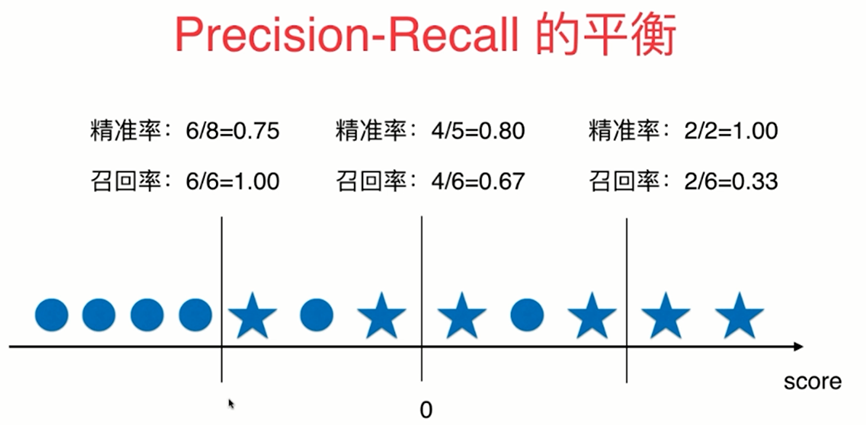

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 将十分类问题转化为二分类问题
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [4]:
y_predict = log_reg.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [6]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [7]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [8]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

## 10.5.2 LogisticRegression 中的decision_function

In [9]:
log_reg.decision_function(X_test)

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 , -66.25139191, -51.09600903,
       -31.49348767, -46.05335761, -38.67875653, -29.80471251,
       -37.58849546, -82.57569732, -37.81903096, -11.01165509,
        -9.17439784, -85.13004331, -16.71617974, -46.23725224,
        -5.32992784, -47.91762441, -11.66729524, -39.1960157 ,
       -25.25293243, -14.3664722 , -16.99783066, -28.91904826,
       -34.33940562, -29.47603768,  -7.85812845,  -3.82094912,
       -24.08161558, -22.16362592, -33.61218699, -23.14023293,
       -26.9180406 , -62.3893701 , -38.85690022, -66.77259733,
       -20.14482853, -17.47886658, -18.06799819, -22.22224569,
       -29.62302848, -19.73171824,   1.49552053,   8.32079827,
       -36.29307324, -42.50732725, -25.90460192, -34.98959422,
        -8.42010631, -50.04725431, -51.48208247,  19.88958588,
        -8.91888462, -31.99343636, -11.66099193,  -0.47

In [10]:
log_reg.decision_function(X_test)[:10]

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 ])

In [11]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
decision_scores = log_reg.decision_function(X_test)

In [13]:
np.min(decision_scores)

-85.68608522646575

In [14]:
np.max(decision_scores)

19.8895858799022

In [15]:
# threshold设置为5
y_predict2 = np.array(decision_scores >= 5, dtype='int')

In [16]:
confusion_matrix(y_test, y_predict2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [17]:
precision_score(y_test, y_predict2)

0.96

In [18]:
# threshold设置为-5
y_predict3 = np.array(decision_scores >= -5, dtype='int')

In [19]:
confusion_matrix(y_test, y_predict3)

array([[390,  15],
       [  5,  40]], dtype=int64)

In [20]:
precision_score(y_test, y_predict3)

0.7272727272727273